In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [130]:
data = pd.read_csv("Car_sales.csv")
data["Sales_in_thousands"] = data["Sales_in_thousands"] * 1000
data["Price_in_thousands"] = data["Price_in_thousands"] * 1000

data.drop("__year_resale_value",axis=1,inplace=True)
data.drop("Latest_Launch",axis=1,inplace=True)
data.drop("Wheelbase",axis=1,inplace=True)
data.drop("Curb_weight",axis=1,inplace=True)
data.drop("Vehicle_type",axis=1,inplace=True)
data.drop("Model",axis=1,inplace=True)
data.drop("Sales_in_thousands",axis=1,inplace=True)
data.rename(columns={"Price_in_thousands":"Price"},inplace=True)

data.dropna(subset=["Engine_size"],inplace=True)

In [131]:
v = {"Price":data["Price"].mean(),
     "Fuel_efficiency":data["Fuel_efficiency"].mean(),
     "Power_perf_factor":data["Power_perf_factor"].mean()}

data.fillna(v,inplace=True)

In [132]:
data

,Manufacturer,Price,Engine_size,Horsepower,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,21500.000000,1.8,140.0,67.3,172.4,13.2,28.0,58.280150
1,Acura,28400.000000,3.2,225.0,70.3,192.9,17.2,25.0,91.370778
2,Acura,27390.754839,3.2,225.0,70.6,192.0,17.2,26.0,77.043591
3,Acura,42000.000000,3.5,210.0,71.4,196.6,18.0,22.0,91.389779
4,Audi,23990.000000,1.8,150.0,68.2,178.0,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...
152,Volvo,24400.000000,1.9,160.0,67.6,176.6,15.8,25.0,66.498812
153,Volvo,27500.000000,2.4,168.0,69.3,185.9,17.9,25.0,70.654495
154,Volvo,28800.000000,2.4,168.0,69.3,186.2,17.9,25.0,71.155978
155,Volvo,45500.000000,2.3,236.0,71.5,185.7,18.5,23.0,101.623357


In [133]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
#data["Manufacturer"] = l.fit_transform(data["Manufacturer"])
full_data = data.copy()
a = pd.get_dummies(data["Manufacturer"])

data = pd.concat([data,a],axis=1)
data.drop("Manufacturer",inplace=True,axis=1)
data

,Price,Engine_size,Horsepower,Width,Length,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Acura,Audi,...,Oldsmobile,Plymouth,Pontiac,Porsche,Saab,Saturn,Subaru,Toyota,Volkswagen,Volvo
0,21500.000000,1.8,140.0,67.3,172.4,13.2,28.0,58.280150,1,0,...,0,0,0,0,0,0,0,0,0,0
1,28400.000000,3.2,225.0,70.3,192.9,17.2,25.0,91.370778,1,0,...,0,0,0,0,0,0,0,0,0,0
2,27390.754839,3.2,225.0,70.6,192.0,17.2,26.0,77.043591,1,0,...,0,0,0,0,0,0,0,0,0,0
3,42000.000000,3.5,210.0,71.4,196.6,18.0,22.0,91.389779,1,0,...,0,0,0,0,0,0,0,0,0,0
4,23990.000000,1.8,150.0,68.2,178.0,16.4,27.0,62.777639,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,24400.000000,1.9,160.0,67.6,176.6,15.8,25.0,66.498812,0,0,...,0,0,0,0,0,0,0,0,0,1
153,27500.000000,2.4,168.0,69.3,185.9,17.9,25.0,70.654495,0,0,...,0,0,0,0,0,0,0,0,0,1
154,28800.000000,2.4,168.0,69.3,186.2,17.9,25.0,71.155978,0,0,...,0,0,0,0,0,0,0,0,0,1
155,45500.000000,2.3,236.0,71.5,185.7,18.5,23.0,101.623357,0,0,...,0,0,0,0,0,0,0,0,0,1


In [134]:
y = data["Price"]
x = data.drop("Price",axis=1)

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=0.3)

model = SVR(kernel="linear")
cvs = cross_val_score(model, x_tr,y_tr,cv=4)
cvs.mean()

0.7387626579350602

In [135]:
model.fit(x_tr,y_tr)

from sklearn.metrics import r2_score

y_p = model.predict(x_te)
print(r2_score(y_te,y_p))

0.7381621984520131


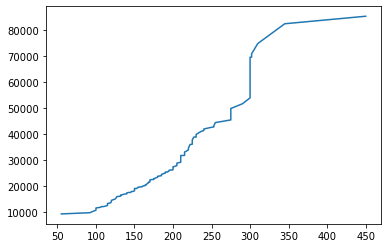

In [136]:
plt.plot(data["Horsepower"].sort_values(),data["Price"].sort_values())

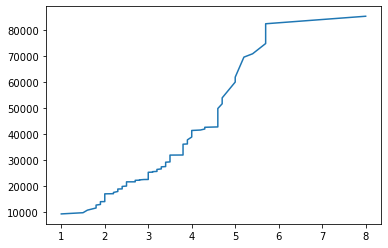

In [137]:
plt.plot(data["Engine_size"].sort_values(),data["Price"].sort_values())

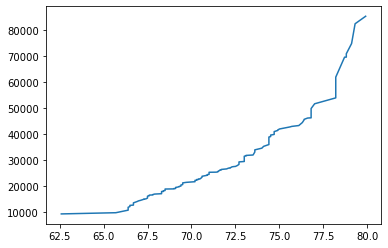

In [138]:
plt.plot(data["Width"].sort_values(),data["Price"].sort_values())

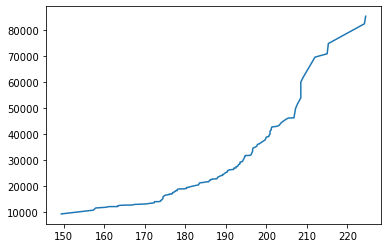

In [139]:
plt.plot(data["Length"].sort_values(),data["Price"].sort_values())

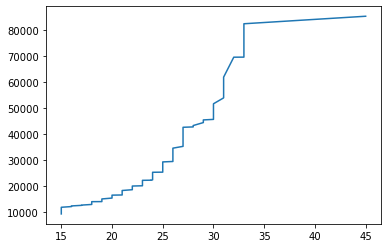

In [140]:
plt.plot(data["Fuel_efficiency"].sort_values(),data["Price"].sort_values())

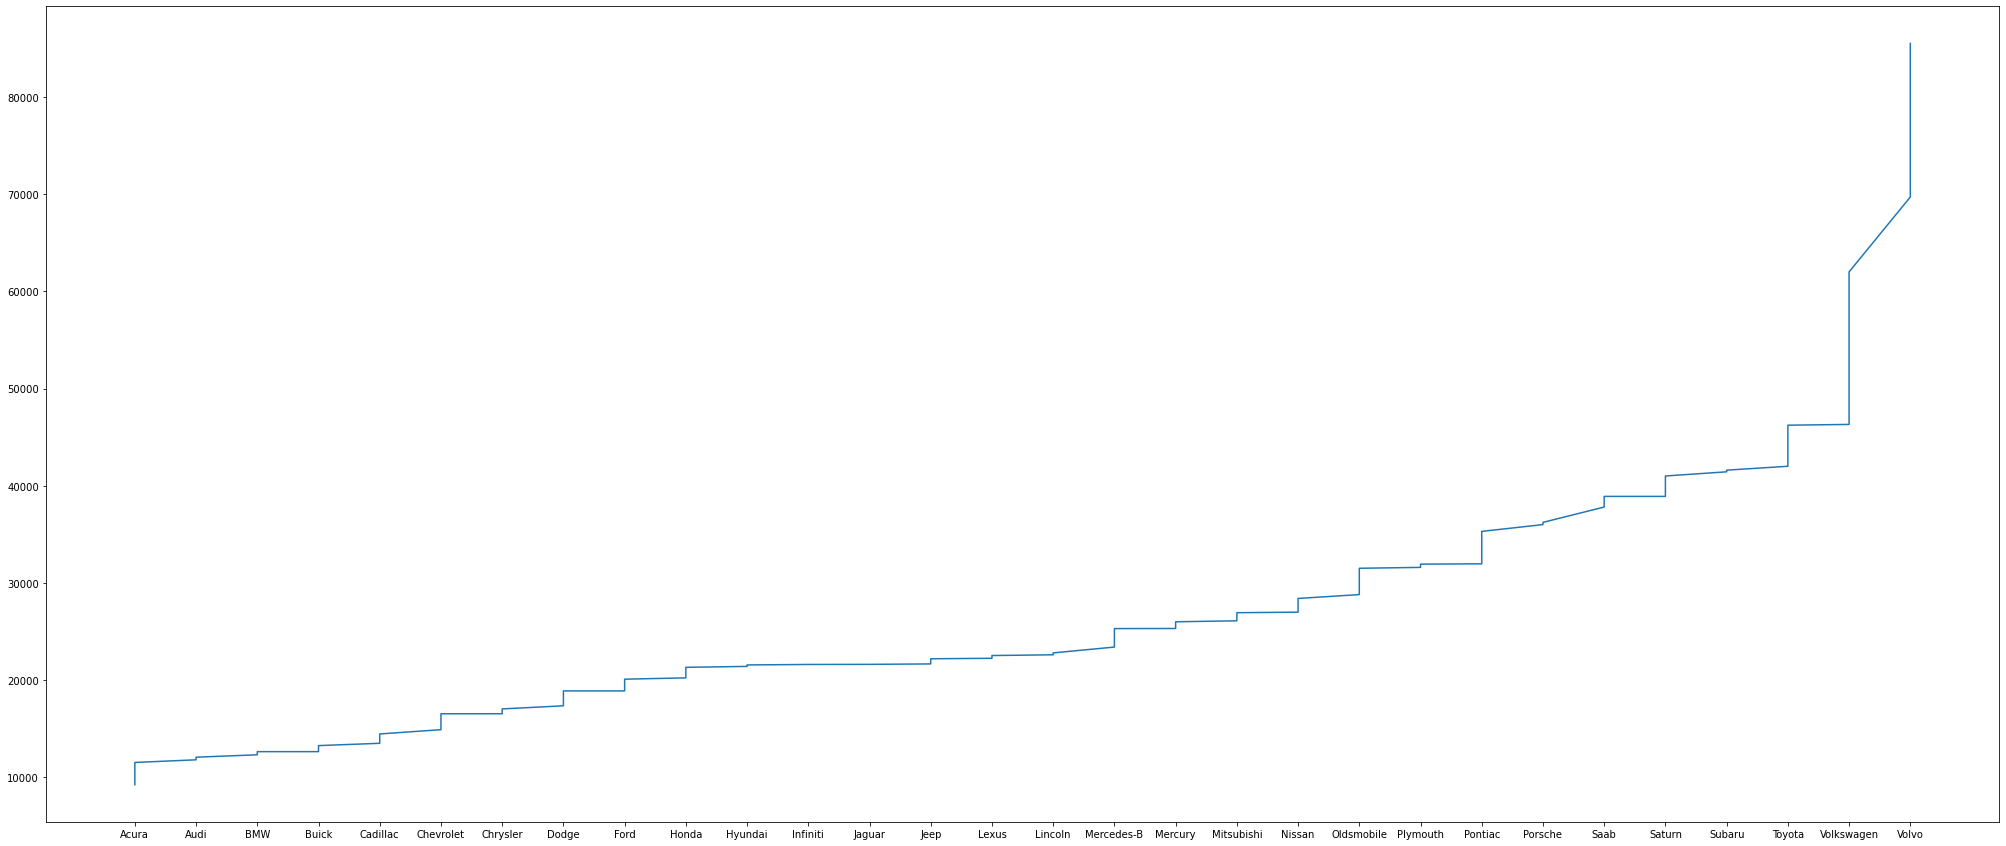

In [146]:
plt.figure(figsize=(35,15))
plt.plot(full_data["Manufacturer"].sort_values(),data["Price"].sort_values())